In [1]:
#!pip install pycaret==2.1.2

## Importación de datos

In [2]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Preprocesamiento

Para más informacion: https://pycaret.org/regression/

In [3]:
from pycaret.regression import *

In [4]:
s = setup(data, target = 'charges', session_id = 123,
           normalize = True,
           polynomial_features = True, trigonometry_features = True, feature_interaction=True, 
           bin_numeric_features= ['age', 'bmi'],
         silent= True)

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 56)"


In [5]:
get_config('X')

,age_Power2,bmi_Power2,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,...,children_1_multiply_bmi_Power2,smoker_yes_multiply_bmi_Power2,children_0_multiply_age_Power2,bmi_Power2_multiply_age_Power2,smoker_yes_multiply_region_southeast,bmi_Power2_multiply_smoker_yes,smoker_yes_multiply_sex_female,region_southeast_multiply_smoker_yes,smoker_yes_multiply_age_Power2,bmi_Power2_multiply_children_1
0,-1.212509,-0.518103,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.000000,-0.518103,-1.212509,0.628205,0.0,-0.518103,1.0,0.0,-1.212509,-0.000000
1,-1.245334,0.445771,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.445771,0.000000,-0.000000,-0.555134,0.0,0.000000,0.0,0.0,-0.000000,0.445771
2,-0.837237,0.308878,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.000000,-0.000000,-0.258604,0.0,0.000000,0.0,0.0,-0.000000,0.000000
3,-0.566651,-1.218086,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,-0.000000,-0.566651,0.690230,0.0,-0.000000,0.0,0.0,-0.000000,-0.000000
4,-0.624317,-0.369944,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,-0.000000,-0.624317,0.230962,0.0,-0.000000,0.0,0.0,-0.000000,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.685141,-0.036887,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.000000,-0.000000,0.000000,-0.025272,0.0,-0.000000,0.0,0.0,0.000000,-0.000000
1334,-1.245334,0.122193,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,-1.245334,-0.152171,0.0,0.000000,0.0,0.0,-0.000000,0.000000
1335,-1.245334,1.024915,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,-1.245334,-1.276361,0.0,0.000000,0.0,0.0,-0.000000,0.000000
1336,-1.141535,-0.818366,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.000000,-0.000000,-1.141535,0.934194,0.0,-0.000000,0.0,0.0,-0.000000,-0.000000


## Entrenamiento de modelos

In [6]:
best = compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2765.1691,24266513.1027,4905.3649,0.8248,0.4520,0.3350,0.0570
br,Bayesian Ridge,3189.6946,25598189.8419,5044.3245,0.8189,0.4565,0.3402,0.0060
ridge,Ridge Regression,3187.4814,25648704.6000,5049.1279,0.8186,0.4702,0.3397,0.0050
lasso,Lasso Regression,3186.3855,25755016.0000,5059.6271,0.8181,0.4838,0.3397,0.0080
lr,Linear Regression,3193.7873,25774115.8000,5061.8329,0.8179,0.4544,0.3410,0.3630
lightgbm,Light Gradient Boosting Machine,3032.7413,25927858.5229,5080.3926,0.8134,0.5063,0.3655,0.0300
omp,Orthogonal Matching Pursuit,3202.2126,26678694.5399,5146.6212,0.8128,0.4396,0.3365,0.0060
llar,Lasso Least Angle Regression,3309.3102,26855492.9278,5161.4994,0.8107,0.4820,0.3931,0.0150
rf,Random Forest Regressor,2856.2995,26352845.9366,5118.3705,0.8106,0.4919,0.3616,0.1470
huber,Huber Regressor,2098.9667,27980917.8382,5269.1484,0.8040,0.3975,0.0829,0.0270


In [7]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [8]:
gbr = create_model('gbr', fold=6)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3123.4360,29163747.5478,5400.3470,0.8104,0.4567,0.3419
1,2780.0729,23315467.3191,4828.6093,0.8148,0.5020,0.3957
2,3098.6133,28091561.2259,5300.1473,0.7837,0.4900,0.3293
3,2686.3483,22696876.7471,4764.1239,0.8503,0.3724,0.2753
4,2518.3907,18862808.8748,4343.1335,0.8900,0.4472,0.3403
5,2940.2648,28236526.3945,5313.8053,0.8160,0.5242,0.4022
Mean,2857.8543,25061164.6848,4991.6944,0.8275,0.4654,0.3474
SD,218.3231,3722775.4616,379.6735,0.0340,0.0491,0.0427


## Optimizacion de modelos

In [9]:
params = {
    'learning_rate': [0.01, 0.1],
    'max_depth': [5, 6, 7, 8],
    'subsample': [0.6, 0.7, 0.8],
    'n_estimators' : [100, 300, 400, 500]
}

tuned_gbr = tune_model(gbr,
                      optimize='R2',
                      custom_grid=params,
                      n_iter=20)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2884.9086,23177248.2882,4814.2755,0.8616,0.4714,0.3774
1,3248.9548,33500043.4075,5787.9222,0.8052,0.4840,0.3560
2,3138.1158,26940878.6390,5190.4603,0.6589,0.5608,0.4815
3,3294.7679,26365056.6289,5134.6915,0.7799,0.5670,0.5619
4,3222.2738,28048258.9245,5296.0607,0.7914,0.5067,0.3886
5,2679.0047,20770047.5005,4557.4168,0.8664,0.3701,0.2847
6,2622.3197,22121646.9154,4703.3655,0.8495,0.4438,0.3826
7,2853.4739,26103457.2238,5109.1543,0.8565,0.4570,0.3100
8,2723.5054,22343530.0762,4726.8943,0.8557,0.4884,0.4405
9,3207.8423,30160978.2855,5491.9012,0.8057,0.5961,0.5472


## Evaluación del modelo

Para más información: https://pycaret.org/plot-model/

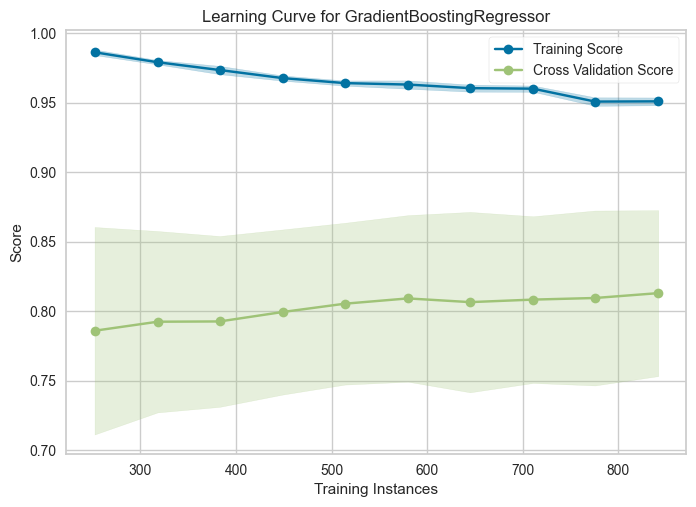

In [10]:
plot_model(tuned_gbr, plot='learning')

## Guardado del modelo

In [11]:
save_model(tuned_gbr, 'deployment_tuned_gbr')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                                            learning_rate=0.01, loss='ls',
                                            max_depth=6, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                          

## Probando el modelo

In [12]:
deployment_tuned_gbr = load_model('deployment_tuned_gbr')

Transformation Pipeline and Model Successfully Loaded


In [13]:
import pandas as pd

cols =  ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

records = [
       [30, 'male', 20, 0, 'no', 'southeast'],
       [30, 'male', 20, 0, 'yes', 'southeast'],
       [30, 'male', 35, 0, 'yes', 'southeast'],
       [70, 'male', 35, 0, 'yes', 'southeast'],
       [30, 'female', 20, 0, 'no', 'southeast'],
       [30, 'female', 20, 0, 'yes', 'southeast'],
       [30, 'female', 35, 0, 'yes', 'southeast'],
       [70, 'female', 35, 0, 'yes', 'southeast'] 
]

new_data = pd.DataFrame(data=records, columns=cols)

In [14]:
predict_model(deployment_tuned_gbr, new_data)

,age,sex,bmi,children,smoker,region,Label
0,30,male,20,0,no,southeast,6603.975914
1,30,male,20,0,yes,southeast,18376.014164
2,30,male,35,0,yes,southeast,35919.273029
3,70,male,35,0,yes,southeast,45953.791150
4,30,female,20,0,no,southeast,7678.592588
5,30,female,20,0,yes,southeast,18574.430486
6,30,female,35,0,yes,southeast,40057.913876
7,70,female,35,0,yes,southeast,45998.981146
